# Task

* a = -2.28
* b = 2.98
* c = 7.58
* d = 9.11

4. Solve analytically the ODE in the form of:
   
$a \cdot \ddot{x} + b \cdot \dot{x} + c \cdot x = d$

4. From the list take coefficients of your ODE and solve them with three integrators: Explicit/Implicit Euler, Rung-Kutta methods.
5. Compare results of these methods with analytical solution, dicsuss and conclude your thoughts in the .pdf report.
6. Name of the report should be "Your_ISU_number_YourName_task1.pdf"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess
        
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            
            if error < tol:
                break
    
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    
    return x_hist, t

* Standart view of the equation:

$$\ddot{x} + \frac{b}{a} \cdot \dot{x} + \frac{c}{a} \cdot x = \frac{d}{a}$$

### Analytic solution

$$\ddot{x} + \frac{b}{a} \cdot \dot{x} + \frac{c}{a} \cdot x = 0$$
$$x(t) = e^{\lambda \cdot t}$$
$$\lambda^2 + \frac{b}{a} \cdot \lambda + \frac{c}{a} = 0$$

In [37]:
a = -2.28
b = 2.98
c = 7.58
d = 9.11

D = (b/a)**2 - 4 * (c/a)
print(D)
if D > 0:
    C1 = (-b + np.sqrt(D)) / (2 * a)
    C2 = (-b - np.sqrt(D)) / (2 * a)
    print(f'C1: {C1},\nC2: {C2}')
elif D == 0:
    C = (-b) / (2 * a)
    print(f'C: {C}')

15.006540473991999
C1: -0.1960148302074309,
C2: 1.5030323740670801


### Numerical solution

$$-2.28x'' + 2.98x' + 7.58x = 9.11$$

* first-order ODE:
$$y_1 = x$$
$$y_2 = x' = y_1'$$

* solution:
$$y_1' = y_2$$
$$y_2' = \frac{d - b \cdot y_2 - c \cdot y_1}{a}$$

In [38]:
def Dynamics(y):
    dydt = np.array([y[1], (d - b * y[1] - c * y[0]) / (a)])
    return dydt

# Initial states
x0 = np.array([0.1, 0.0])   # [angle, angular_velocity]
Tf = 10.0
h = 0.01

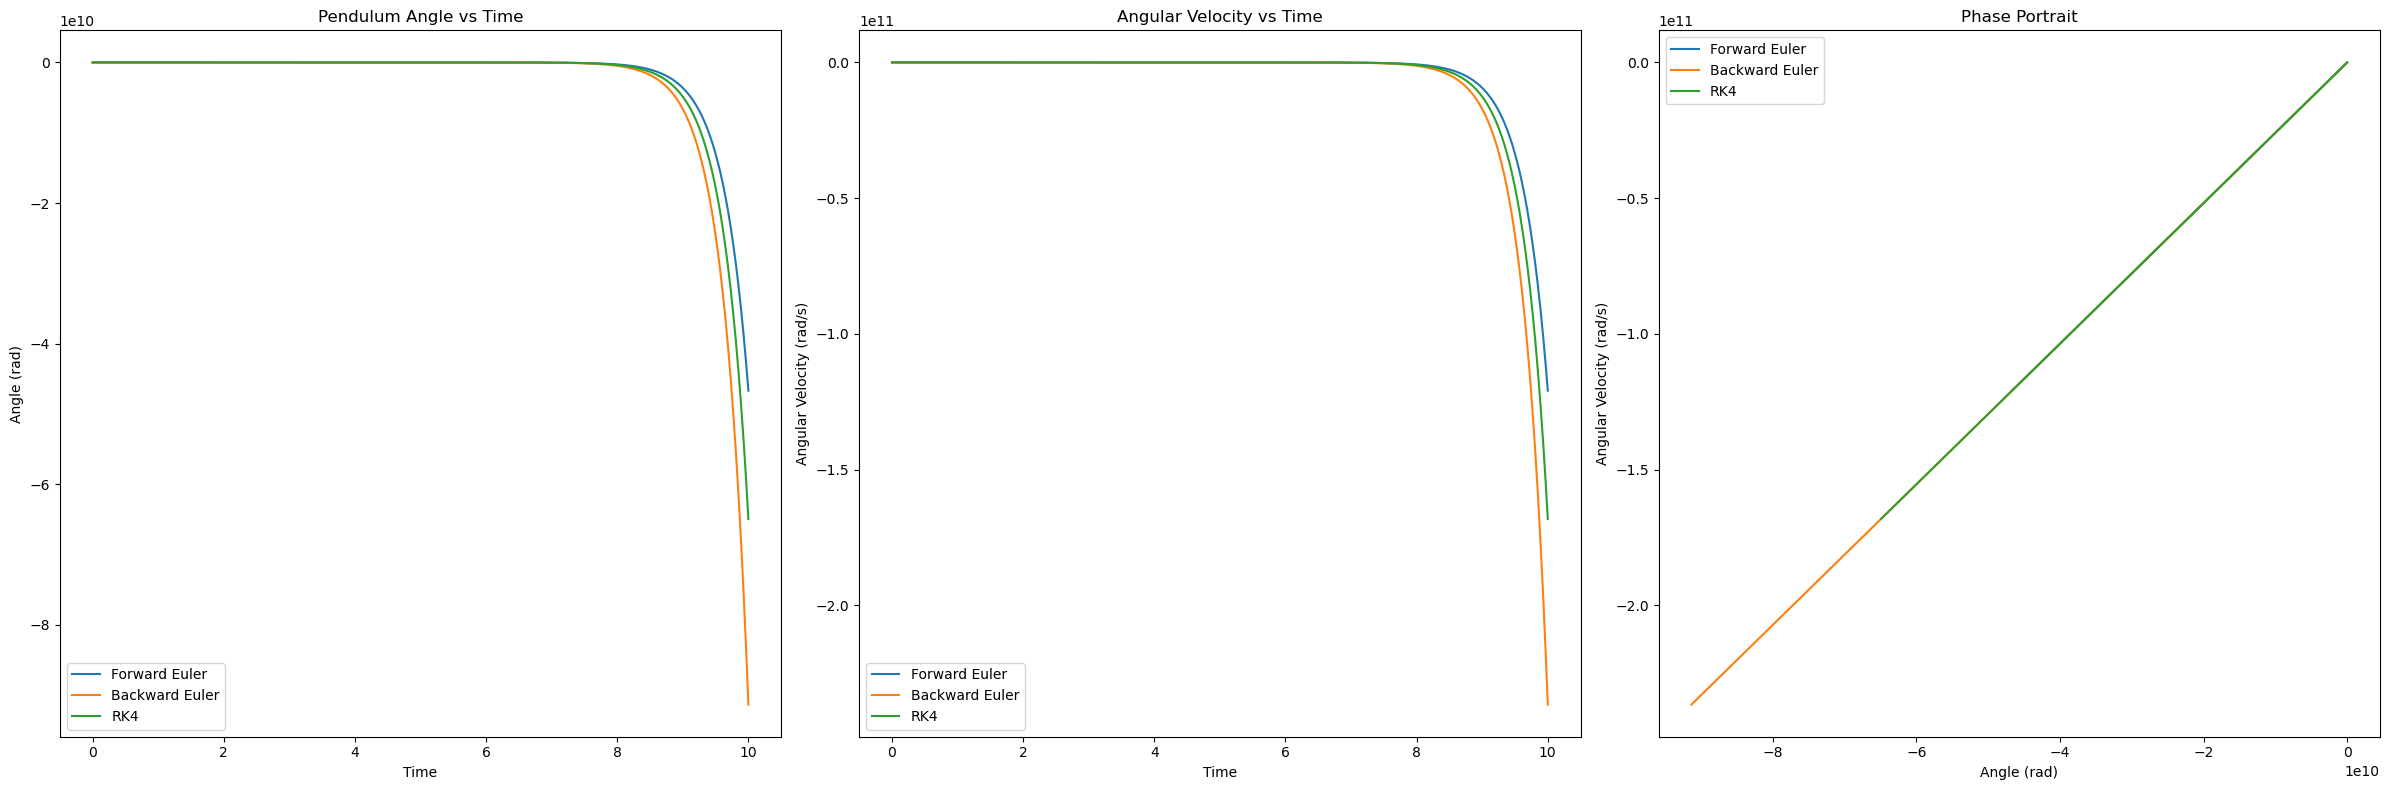

In [39]:
# Forward Euler
x_fe, t_fe = forward_euler(Dynamics, x0, Tf, h)

# Backward Euler  
x_be, t_be = backward_euler(Dynamics, x0, Tf, h)

# Runge-Kutta 4
x_rk4, t_rk4 = runge_kutta4(Dynamics, x0, Tf, h)

# Plot results
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.plot(t_fe, x_fe[0, :], label='Forward Euler')
plt.plot(t_be, x_be[0, :], label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], label='RK4')
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum Angle vs Time')

plt.subplot(1, 3, 2)
plt.plot(t_fe, x_fe[1, :], label='Forward Euler')
plt.plot(t_be, x_be[1, :], label='Backward Euler') 
plt.plot(t_rk4, x_rk4[1, :], label='RK4')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Angular Velocity vs Time')

plt.subplot(1, 3, 3)
plt.plot(x_fe[0, :], x_fe[1, :], label='Forward Euler')
plt.plot(x_be[0, :], x_be[1, :], label='Backward Euler')
plt.plot(x_rk4[0, :], x_rk4[1, :], label='RK4')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Phase Portrait')

plt.tight_layout()
plt.show()

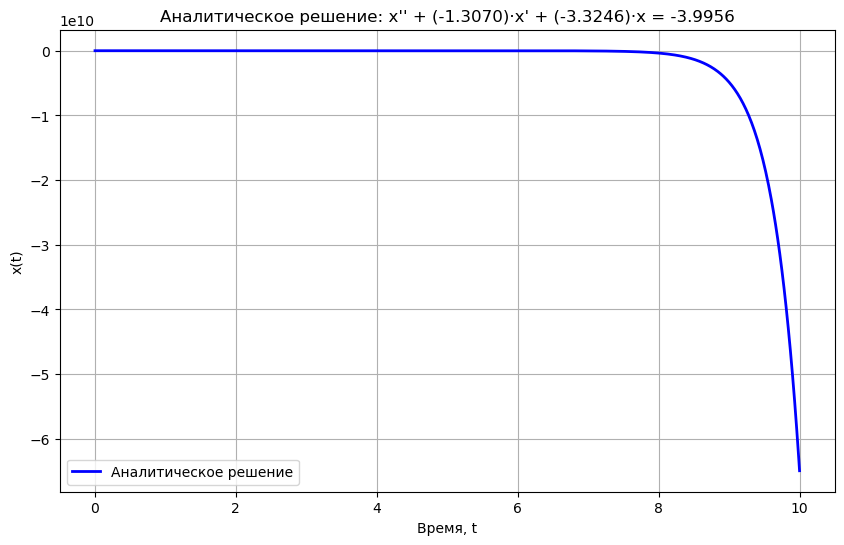

Корни характеристического уравнения: λ1 = 2.5904, λ2 = -1.2834
Частное решение: x_p = 1.2018


In [24]:
import numpy as np
import matplotlib.pyplot as plt

a = -2.28
b = 2.98
c = 7.58
d = 9.11

# x'' + (b/a)*x' + (c/a)*x = d/a
A = 1.0 
B = b / a
C = c / a
D = d / a

# Начальные условия
x0 = 0.1  # x(0)
x0_dot = 0.0  # x'(0)

# λ² + B*λ + C = 0
discriminant = B**2 - 4*C
lambda1 = (-B + np.sqrt(discriminant)) / 2
lambda2 = (-B - np.sqrt(discriminant)) / 2

# Частное решение
x_particular = D / C

# Находим константы из начальных условий
if discriminant > 0:
    A_matrix = np.array([[1, 1], [lambda1, lambda2]])
    b_vector = np.array([x0 - x_particular, x0_dot])
    C1, C2 = np.linalg.solve(A_matrix, b_vector)
    
    def analytical_solution(t):
        return C1 * np.exp(lambda1 * t) + C2 * np.exp(lambda2 * t) + x_particular
        
elif discriminant == 0:
    C1 = x0 - x_particular
    C2 = x0_dot - lambda1 * C1
    
    def analytical_solution(t):
        return (C1 + C2 * t) * np.exp(lambda1 * t) + x_particular
    
else:
    alpha = -B / 2
    beta = np.sqrt(-discriminant) / 2
    C1 = x0 - x_particular
    C2 = (x0_dot - alpha * C1) / beta
    
    def analytical_solution(t):
        return np.exp(alpha * t) * (C1 * np.cos(beta * t) + C2 * np.sin(beta * t)) + x_particular

# Временной интервал
t = np.linspace(0, 10, 1000)
x_analytical = analytical_solution(t)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(t, x_analytical, 'b-', linewidth=2, label='Аналитическое решение')
plt.xlabel('Время, t')
plt.ylabel('x(t)')
plt.title(f'Аналитическое решение: x\'\' + ({B:.4f})·x\' + ({C:.4f})·x = {D:.4f}')
plt.grid(True)
plt.legend()
plt.show()

print(f"Корни характеристического уравнения: λ1 = {lambda1:.4f}, λ2 = {lambda2:.4f}")
print(f"Частное решение: x_p = {x_particular:.4f}")